# NLP using Word Vectors with Spacy

This notebook will show you how to ustilise word vectors using spacy and how they can be used in creating and "What to read next..." system.

[Spacy](https://spacy.io/) is a production grade open source NLP library that includes word vectors!

In [1]:
import spacy 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**TASK** : load the word vectors by running :

```python
nlp = spacy.load('en_core_web_lg')
```

You can see [here](https://spacy.io/models/en#en_core_web_lg) that this model contains 685,000 unique word vectors!!

In [2]:
# YOUR CODE GOES HERE

nlp = spacy.load('en_core_web_md')

## Let's get comfortable with a single word vector

**TASK** : get the vector of any word by running:
```python
nlp('dog').vector
```

In [3]:
# YORU CODE GOES HERE

nlp('dog').vector

array([ -4.01760012e-01,   3.70570004e-01,   2.12810002e-02,
        -3.41250002e-01,   4.95380014e-02,   2.94400007e-01,
        -1.73759997e-01,  -2.79819995e-01,   6.76219985e-02,
         2.16930008e+00,  -6.26909971e-01,   2.91060001e-01,
        -6.72699988e-01,   2.33190000e-01,  -3.42640013e-01,
         1.83109999e-01,   5.02260029e-01,   1.06889999e+00,
         1.46980003e-01,  -4.52300012e-01,  -4.18269992e-01,
        -1.59669995e-01,   2.67479986e-01,  -4.88669991e-01,
         3.64620000e-01,  -4.34029996e-02,  -2.44739994e-01,
        -4.17519987e-01,   8.90880004e-02,  -2.55519986e-01,
        -5.56949973e-01,   1.22429997e-01,  -8.35260004e-02,
         5.50949991e-01,   3.64100009e-01,   1.53610006e-01,
         5.57380021e-01,  -9.07019973e-01,  -4.90979999e-02,
         3.85800004e-01,   3.79999995e-01,   1.44250005e-01,
        -2.72210002e-01,  -3.70160013e-01,  -1.29040003e-01,
        -1.50849998e-01,  -3.80760014e-01,   4.95829992e-02,
         1.27550006e-01,

looks like a lot of numbers, view the number of dimensions by using the `.shape` on a vector:

**the output should look like this**:

```python
(300,)
```

In [4]:
# YOUR CODE GOES HERE

nlp('dog').vector.shape

(300,)

**TASK** : lets visualise the vector values in a bar plot:

```python
plt.bar(range(NUMBER_OF_DIMENSIONS), YOUR_VECTOR)
plt.show()
```

When you have done that, play around with different words to see how they differ on the bar plot:

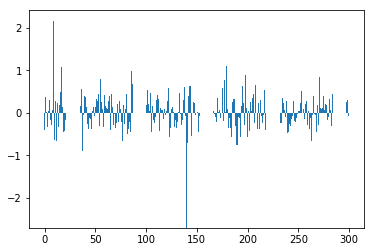

In [5]:
# YOUR CODE GOES HERE

plt.bar(range(300), nlp('dog').vector)
plt.show()

## Let's now do some word comparisons

**TASK** : Create a varible called `cat` and assign it the vector for `"cat"`, and create a varible called `dog` and assign it the vector for `"dog"`:

In [6]:
# YOUR CODE GOES HERE

cat = nlp('cat').vector
dog = nlp('dog').vector

### How to compare vectors

**HEADS UP**- Don't worry if your not comfortable with the following maths, You won't need to fully understand it to progress, it's just a bit of extra background knowledge 😎

On of the most common ways of caparing vectors is using [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

Cosine similarity is a measure focusing on the angle between 2 vectors, if the the angle is small -> the cosine will be high and therefore they are similare vectors, if the angle is large -> the cosine will be small and therefore : they are very different vectors: 

![cosine](images/cosine_similarity.png)

http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

It's calulated withe the following equation :

![cosine equation](images/cosine.svg)

We can do this in raw numpy with the following code:

```python
np.dot(VECTOR_1, VECTOR_2) / (np.linalg.norm(VECTOR_1) * np.linalg.norm(VECTOR_2))
```

**TASK** : Calculate the cosine similarity between your `dog` vector and your `cat` vector:

Your answer should be close to `0.801685`

In [7]:
# YOUR CODE GOES HERE

np.dot(dog, cat) / (np.linalg.norm(dog) * np.linalg.norm(cat))

0.80168533

Ofcourse there are libraries that can do this for your!

**TASK** : import the `cosine` function from the `scipy` package with the following import statement:

```python
from scipy.spatial.distance import cosine
```

In [8]:
# YOUR CODE GOES HERE

from scipy.spatial.distance import cosine

**TASK** : Calulate the similarity between the dog and cat vectors like before using the `cosine` funnction
```python
1 - cosine(VECTOR_1, VECTOR_2)
```

same as before, your answer should be close to 0.801685

In [9]:
# YOUR CODE GOES HERE

1 - cosine(cat, dog)

0.80168542871441517

### Even easier! Spacy has it built in!

Spacy will do this for you using `.similarity` on a nlp object:

```python
nlp('car').similarity(nlp('bike'))
```

**TASK** : Get the similarity between `'dog'` and `'cat'` using spacy's `.similarity` function:

same as before, your answer should be close to 0.801685

In [10]:
# YOUR CODE GOES HERE

nlp('cat').similarity(nlp('dog'))

0.80168538937325962

Below is a list of words, **TASK** : print out how similiar each word is to `'cat'` in order to help you find out which is the best replacement pet:

Check the completed notebook if your get stuck

In [11]:
words = ['car', 'truck', 'dragon', 'data', 'horse', 'fish' , 'lion']

#YOUR CODE GOES HERE

for word in words:
    print(word, nlp('cat').similarity(nlp(word)))

car 0.319075305665
truck 0.29983729522
dragon 0.450325221289
data 0.104425093599
horse 0.484733482248
fish 0.418065352251
lion 0.526543720526


## Onwards to document vectors!

The simplest way to generate a document vector is just to get the average word vector in that document.

You can do this using the techniques you've learnt previously using standard python loops and simple numpy operations e.g adding vectors using `+` and dividing using `/`.

**TASK** : Calculate the average word vector of the sentence below. (I've provided a few bits of code to help)

The `.sum()` of the document vector should around `-0.8358`

Check the completed noetbook if you get stuck

In [12]:
sentence = 'why is the cat on the boat'

# numpy array with the dimensions (300,), filled with zeros
total = np.zeros(300)

# words from the text split into a list
words = sentence.split(' ')

# number of words I the sentence
n = len(words)

# the varible tha the average word vector should be stored in 
average = None


# YOUR CODE GOES HERE

for word in words:
    word_vec = nlp(word).vector
    total += word_vec

average = total / n

# YOUR CODE ENDS HERE


print(average.sum())


-0.835803670343


### How you can do the same thing a bit quicker:

```python
# use list comprehension to get the vectors for each word
word_vector_list = [nlp(word).vector for word in sentence.split(' ')]

# calculate the mean across each word
average_word_vector = np.mean(word_vector_list, axis=0)

# check that the sum is the same as the other way
print(average_word_vector.sum())
```

**TASK** : Copy and past the above code to check it gets a similar result as the previous task (should around `-0.8358`):

In [13]:
# YOUR CODE GOES HERE

# use list comprehension to get the vectors for each word
word_vector_list = [nlp(word).vector for word in sentence.split(' ')]

# covert that list to a numpy array and calculate the mean across each word
average_word_vector = np.mean(word_vector_list, axis=0)

# check that the sum is the same as the other way
print(average_word_vector.sum())

-0.835803


### Spacy to the rescue! again!

Spacy will already do this average word vector calculation for you:

```python
nlp('what ever you want to say').vector
```

**TASK** : Do this for the sentence you used previously and check the sum is similare (should around `-0.8358`):

In [14]:
# YOUR CODE GOES HERE

nlp(sentence).vector.sum()

-0.83580327

Like how you've already done it with words, find out which of the following sentences is most similar to the sentence `'why is my cat on the car'`:

**TASK** : print out the similarity score for each sentence against the `sentence_to_compare` to help you see which one is most similar:

In [24]:
sentence_to_compare = 'why is my cat on the car'

sentences = ["where did my dog go", 
             "dude where's my car",
             "i've lost my cat in the car",
             "get that boat back",
             "find my cat",
             "why is my dog on the drugs"]

# YOURE CODE GOES HERE

for sentence in sentences:
    sim = nlp(sentence_to_compare).similarity(nlp(sentence))
    print(sentence,'-', sim)

where did my dog go - 0.879428120233
dude where's my car - 0.902923529769
i've lost my cat in the car - 0.925151406861
get that boat back - 0.820837202062
find my cat - 0.863482748178
why is my dog on the drugs - 0.928325851442


Let's improve our sentence similarity system by removing stop words i.e very common words that carry little meaning. 

Below we have created the function `remove_stop_words()` which will remove stop words from text passed to it e.g:

```python
remove_stop_words('why is my dog on the drugs')
>> dog drugs
```

**TASK** : Using this function, do the same task as before (print out the similarity score for each sentence against the sentence_to_compare to help you see which one is most similar) but make sure you remove the stop words when your doing it.

In [28]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stop_words(text):
    return ' '.join([word for word in text.split(' ') if word.lower() not in STOP_WORDS])

# YOUR CODE GOES HERE

for sentence in sentences:
    sim = nlp(remove_stop_words(sentence_to_compare)).similarity(nlp(remove_stop_words(sentence)))
    print(sentence,'-', sim)

where did my dog go - 0.703443348496
dude where's my car - 0.71713842303
i've lost my cat in the car - 0.810616945171
get that boat back - 0.461349352674
find my cat - 0.788653348563
why is my dog on the drugs - 0.605002483946


### Alrighty let's visulise some word vectors